# Kamień milowy 2 - Auto Keras
### Damian Skowroński, Tomasz Kurpiński, Jan Kruszewski

#### Naszym zadaniem było stworzenie funkcji służącej do przygotowania zbioru danych opisujących problem predykcyjny do użycia frameworku AutoML - Auto Keras.

#### Funkcja zawarta jest w skrypcie `.py`. Poniżej przedstawiamy wyniki uzyskane za pomocą pliku `.json`, w którym wcześniej zapisaliśmy metryki.

#### Lista dostępnych zbiorów danych

In [102]:
import json
import pandas as pd
import numpy as np
dataset_names = np.array([ 
            "adult",
            "airlines",
            "bank-marketing",
            "credit-g" ,
            "higgs",
            "jasmine",
            "kc1",
            "kr-vs-kp",
            "nomao",
            "numerai28.6",
            "phoneme" ,
            "sylvine",
            "car",
            "cnae-9",
            "connect-4",
            "covertype",
            "mfeat-factors",
            "segment",
            "shuttle",
            "vehicle"
            ])

#### Odczytujemy plik z wynikami zapisując je do tabelki

In [105]:
f = open('results_trials5.json')
data = json.load(f)
df=pd.DataFrame(columns=['dataset_name', 'accuracy', 'recall', 'precision', 'f1_micro', 'finding_best_model_time'])

for i in dataset_names:
    df = df.append({'dataset_name' : i, 
         'accuracy': data[i]['scores']['accuracy'], 
         'recall' : data[i]['scores']['recall'], 
         'precision' :data[i]['scores']['precision'], 
         'f1_micro' : data[i]['scores']['f1_micro'],
        'finding_best_model_time': data[i]['time']},
        
        ignore_index=True)
f.close()

#### Wyniki dla różnych danych 

In [106]:
df

,dataset_name,accuracy,recall,precision,f1_micro,finding_best_model_time
0,adult,0.819016,0.819016,0.819016,0.819016,13.714162
1,airlines,0.624796,0.624796,0.624796,0.624796,5.409910
2,bank-marketing,0.885942,0.885942,0.885942,0.885942,6.144583
3,credit-g,0.712000,0.712000,0.712000,0.712000,7.137818
4,higgs,0.664382,0.664382,0.664382,0.664382,14.322792
5,jasmine,0.965147,0.965147,0.965147,0.965147,37.185698
6,kc1,0.829545,0.829545,0.829545,0.829545,5.784938
7,kr-vs-kp,0.853567,0.853567,0.853567,0.853567,11.348145
8,nomao,0.933271,0.933271,0.933271,0.933271,83.501832
9,numerai28.6,0.499460,0.499460,0.499460,0.499460,30.120320


#### Średnia accuracy

In [119]:
np.mean(df['accuracy'])

0.7252967191865074

#### Jak widać otrzymaliśmy te same wyniki dla różnych metryk. Wydaje nam się, że jest to związane z obraniem parametru micro dla wszystkich metryk poza accuracy. Informacje na ten temat znaleźliśmy w artykule: https://arxiv.org/pdf/2008.05756.pdf

#### Wykres z wynikami dla wybranych metryk

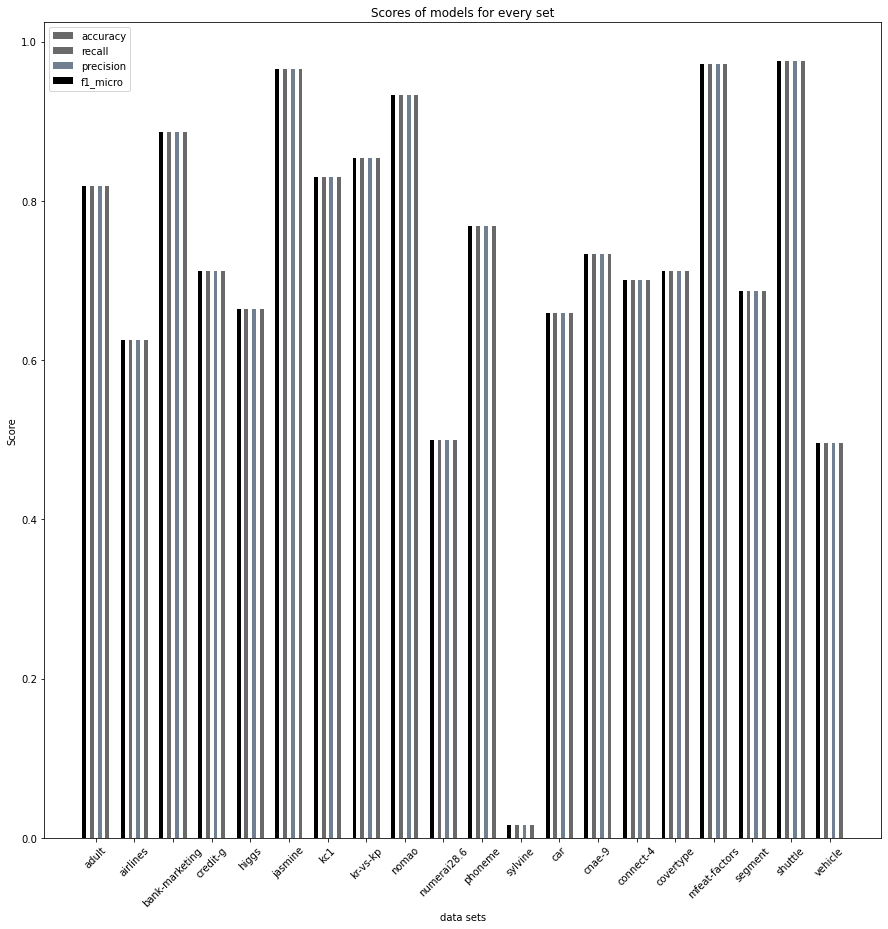

In [114]:
import matplotlib.pyplot as plt 
  
X = dataset_names
  
X_axis = np.arange(len(X))
plt.figure(figsize=(15, 15))

plt.bar(X_axis + 0.3, df['accuracy'], 0.1, label = 'accuracy', color='dimgrey')
plt.bar(X_axis - 0.1, df['recall'], 0.1, label = 'recall', color='dimgrey')
plt.bar(X_axis + 0.1, df['precision'], 0.1, label = 'precision', color='slategrey')
plt.bar(X_axis - 0.3, df['f1_micro'], 0.1, label = 'f1_micro', color='k')
  
plt.xticks(X_axis, X)
plt.xlabel("data sets")
plt.ylabel("Score")
plt.title("Scores of models for every set")
plt.xticks(rotation = 45)
plt.legend()
plt.show()

## Podsumowanie
* Wyniki oscylują średnio wokół wyniku 0.725.
* Najlepsze wyniki otrzymaliśmy dla zbiorów `jasmine`, `mfeat-factors` i `shuttle`.
* Zdecydowanie najgorszy wynik mogłoby się zdawać mamy dla zbioru `sylvine`, jednak mamy tu do czynienia z klasyfikacją binarną, więc wystarczy zamienić etykiety by otrzymać bardzo dobry wynik.